# House Sales in King County, USA


This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.


| Variable      | Description                                                                                                 |
| ------------- | ----------------------------------------------------------------------------------------------------------- |
| id            | A notation for a house                                                                                      |
| date          | Date house was sold                                                                                         |
| price         | Price is prediction target                                                                                  |
| bedrooms      | Number of bedrooms                                                                                          |
| bathrooms     | Number of bathrooms                                                                                         |
| sqft_living   | Square footage of the home                                                                                  |
| sqft_lot      | Square footage of the lot                                                                                   |
| floors        | Total floors (levels) in house                                                                              |
| waterfront    | House which has a view to a waterfront                                                                      |
| view          | Has been viewed                                                                                             |
| condition     | How good the condition is overall                                                                           |
| grade         | overall grade given to the housing unit, based on King County grading system                                |
| sqft_above    | Square footage of house apart from basement                                                                 |
| sqft_basement | Square footage of the basement                                                                              |
| yr_built      | Built Year                                                                                                  |
| yr_renovated  | Year when house was renovated                                                                               |
| zipcode       | Zip code                                                                                                    |
| lat           | Latitude coordinate                                                                                         |
| long          | Longitude coordinate                                                                                        |
| sqft_living15 | Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area |
| sqft_lot15    | LotSize area in 2015(implies-- some renovations)                                                            |


In [ ]:
# All Libraries required for this lab are listed below. The libraries pre-installed on Skills Network Labs are commented.
# !pip install pandas==1.3.4 numpy==1.21.4 seaborn==0.9.0 matplotlib==3.5.0 scikit-learn==0.20.1
!pip install pandas numpy seaborn matplotlib scikit-learn
# Note: If your environment doesn't support "!mamba install", use "!pip install"

In [25]:
 # Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [ ]:
# import piplite
# await piplite.install(['pandas','matplotlib','scikit-learn','seaborn', 'numpy'])

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline

# Importing Data Sets

The functions below will download the dataset into the browser:


In [ ]:
# from pyodide.http import pyfetch

# async def download(url, filename):
#     response = await pyfetch(url)
#     if response.status == 200:
#         with open(filename, "wb") as f:
#             f.write(await response.bytes())

In [43]:
import requests

def download(url, filename):
    response = requests.get(url)
    with open(filename, 'wb') as f:
        f.write(response.content)

In [45]:
file_name='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/kc_house_data_NaN.csv'

In [ ]:
# await download(file_name, "kc_house_data_NaN.csv")
# file_name="kc_house_data_NaN.csv"

You will need to download the dataset; if you are running locally, please comment out the following code: 


In [47]:
download(file_name, "kc_house_data_NaN.csv")
file_name="kc_house_data_NaN.csv"

Use the Pandas method <b>read_csv()</b> to load the data from the web address.


In [286]:
df = pd.read_csv(file_name)

We use the method <code>head</code> to display the first 5 columns of the dataframe.


In [288]:
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503




Display the data types of each column using the function dtypes, then take a screenshot and submit it, include your code in the image.


In [109]:
df.dtypes

Unnamed: 0         int64
id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

We use the method describe to obtain a statistical summary of the dataframe.


In [111]:
df.describe()

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00000,2.161300e+04,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,10806.00000,4.580302e+09,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,6239.28002,2.876566e+09,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,0.00000,1.000102e+06,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,5403.00000,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,10806.00000,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,16209.00000,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,21612.00000,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,...,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


# Data Wrangling




Drop the columns <code>"id"</code>  and <code>"Unnamed: 0"</code> from axis 1 using the method <code>drop()</code>, then use the method <code>describe()</code> to obtain a statistical summary of the data. Take a screenshot and submit it, make sure the <code>inplace</code> parameter is set to <code>True</code>


In [290]:
df.drop("id", axis = 1, inplace = True)
df.drop("Unnamed: 0", axis = 1, inplace = True)
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


### We can see we have missing values for the columns <code> bedrooms</code>  and <code> bathrooms </code>


In [292]:
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())


number of NaN values for the column bedrooms : 13
number of NaN values for the column bathrooms : 10


We can replace the missing values of the column <code>'bedrooms'</code> with the mean of the column  <code>'bedrooms' </code> using the method <code>replace()</code>. Don't forget to set the <code>inplace</code> parameter to <code>True</code>


In [294]:
mean=df['bedrooms'].mean()
df['bedrooms'].replace(np.nan,mean, inplace=True)

We also replace the missing values of the column <code>'bathrooms'</code> with the mean of the column  <code>'bathrooms' </code> using the method <code>replace()</code>. Don't forget to set the <code> inplace </code>  parameter top <code> True </code>


In [296]:
mean=df['bathrooms'].mean()
df['bathrooms'].replace(np.nan,mean, inplace=True)

In [298]:
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())

number of NaN values for the column bedrooms : 0
number of NaN values for the column bathrooms : 0


# Exploratory Data Analysis




Use the method <code>value_counts</code> to count the number of houses with unique floor values, use the method <code>.to_frame()</code> to convert it to a dataframe.


In [123]:
floors_count = df["floors"].value_counts().to_frame()
floors_count

,count
floors,
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8




Use the function <code>boxplot</code> in the seaborn library  to  determine whether houses with a waterfront view or without a waterfront view have more price outliers.


<Axes: xlabel='waterfront', ylabel='price'>

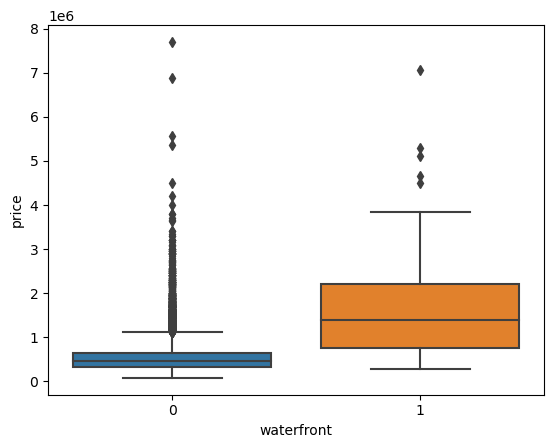

In [125]:
sns.boxplot(x="waterfront", y="price", data=df)



Use the function <code>regplot</code>  in the seaborn library  to  determine if the feature <code>sqft_above</code> is negatively or positively correlated with price.


<Axes: xlabel='sqft_above', ylabel='price'>

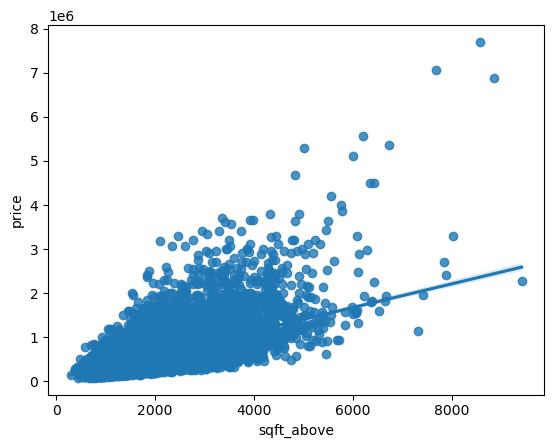

In [127]:
sns.regplot(x="sqft_above", y="price", data=df)

We can use the Pandas method <code>corr()</code>  to find the feature other than price that is most correlated with price.


In [300]:
df.head(5)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [303]:
df.head(5)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [305]:
df_corr = df.drop("date", axis = 1)
df_corr.head(5)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3.0,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3.0,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2.0,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4.0,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3.0,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [307]:
df_corr.corr()['price'].sort_values()

zipcode         -0.053203
long             0.021626
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308797
sqft_basement    0.323816
view             0.397293
bathrooms        0.525738
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64

We can Fit a linear regression model using the  longitude feature <code>'long'</code> and  caculate the R^2.


In [309]:
X = df[['long']]
Y = df['price']
lm = LinearRegression()
lm.fit(X,Y)
lm.score(X, Y)

0.00046769430149029567



Fit a linear regression model to predict the <code>'price'</code> using the feature <code>'sqft_living'</code> then calculate the R^2. Take a screenshot of your code and the value of the R^2.


In [311]:
X = df[["sqft_living"]]
Y = df["price"]
lm = LinearRegression()
lm.fit(X,Y)
lm.score(X,Y)

0.4928532179037931



Fit a linear regression model to predict the <code>'price'</code> using the list of features:


In [313]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]     
Z = df[features]
Y = df["price"]
lm.fit(Z,Y)
Yhat = lm.predict(Z)
Yhat[0:5]

array([283672.14176653, 662168.14176653, 306664.14176653, 408696.14176653,
       532696.14176653])

Then calculate the R^2. Take a screenshot of your code.


In [315]:
lm.score(Z,Y)

0.6576956677966457

In [317]:
new = df[["condition","long","yr_built","sqft_lot15","sqft_lot","yr_renovated","floors", "waterfront", "lat","bedrooms", "sqft_basement" ,"view","bathrooms","sqft_living15","sqft_above","grade","sqft_living"]]
Y = df["price"]
lm.fit(new,Y)
Yhat_new = lm.predict(new)
Yhat_new[0:5]
lm.score(new,Y)

0.6954211480669561



Create a list of tuples, the first element in the tuple contains the name of the estimator:

<code>'scale'</code>

<code>'polynomial'</code>

<code>'model'</code>

The second element in the tuple  contains the model constructor

<code>StandardScaler()</code>

<code>PolynomialFeatures(include_bias=False)</code>

<code>LinearRegression()</code>


In [319]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
Input=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model',LinearRegression())]



Use the list to create a pipeline object to predict the 'price', fit the object using the features in the list <code>features</code>, and calculate the R^2.


In [321]:
pipe=Pipeline(Input)
pipe.fit(Z,Y)
Yhat_Pipe = pipe.predict(Z)
R_square_Pipe = pipe.score(Z,Y)
print('The output of the first four predicted value is: ', Yhat_Pipe[0:4])
print('The R-square is: ', R_square_Pipe)

The output of the first four predicted value is:  [351560. 562256. 450440. 394746.]
The R-square is:  0.7510934048698155


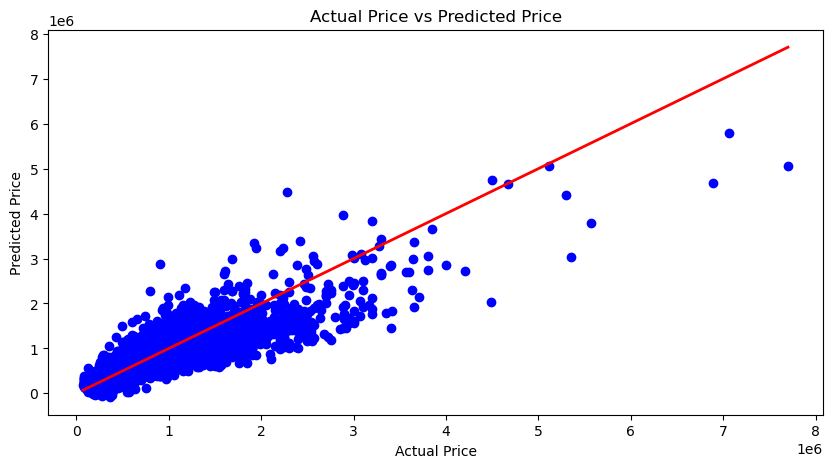

In [323]:
# Plot Actual vs Predicted Prices
plt.figure(figsize=(10, 5))
plt.scatter(Y, Yhat_Pipe, color='blue')
plt.plot([min(Y), max(Y)], [min(Y), max(Y)], color='red', linewidth=2)  # Diagonal line
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()

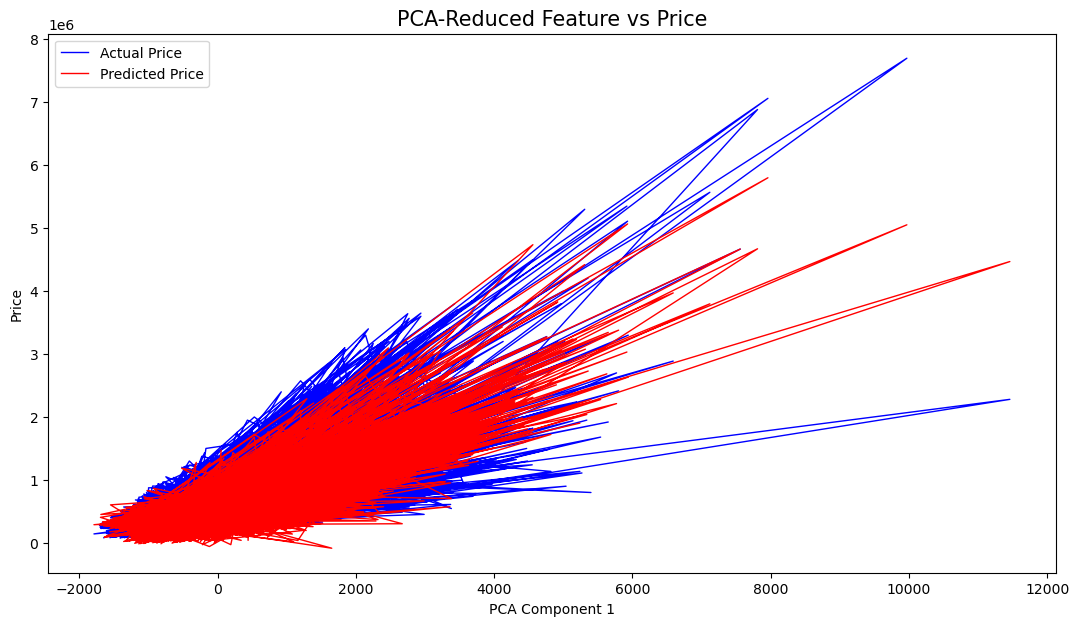

In [325]:
from sklearn.decomposition import PCA

# Apply PCA to reduce features to 1 dimension
pca = PCA(n_components=1)
X_pca = pca.fit_transform(X)

# Plot PCA-reduced feature against Y and Y_pred
plt.figure(figsize=(13, 7))
plt.plot(X_pca, Y, 'b', linewidth=1, label='Actual Price')
plt.plot(X_pca, Yhat_Pipe, 'r', linewidth=1, label='Predicted Price')
plt.title('PCA-Reduced Feature vs Price', size=15)
plt.xlabel('PCA Component 1')
plt.ylabel('Price')
plt.legend()
plt.show()

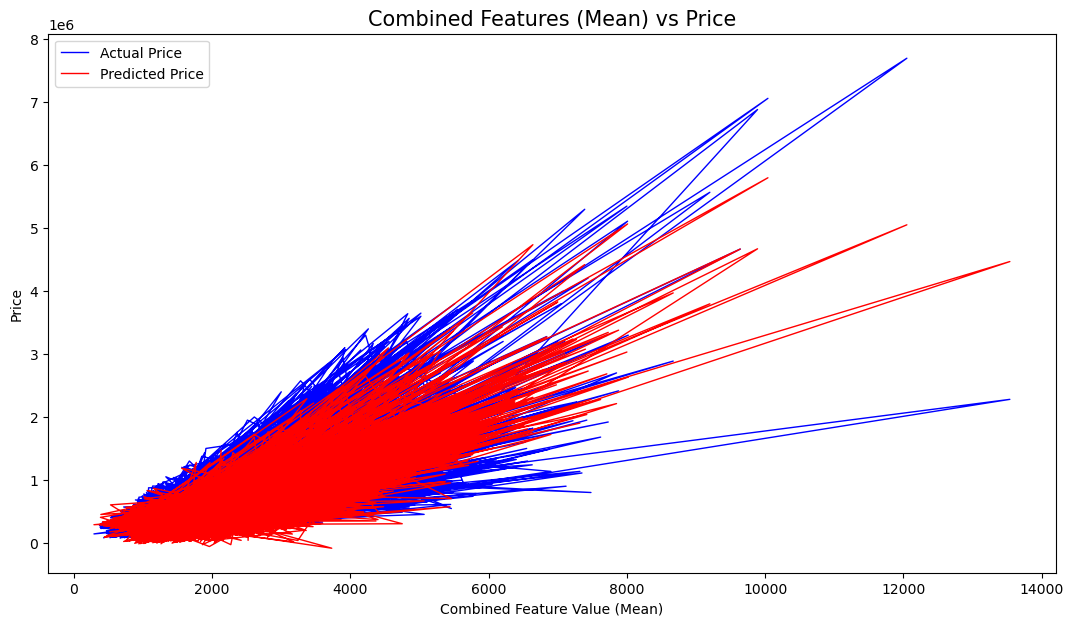

In [327]:
# Option 1: Use the mean of all features as a combined feature for plotting
X_combined = X.mean(axis=1)

# Plot combined feature (mean) vs Y and Y_pred
plt.figure(figsize=(13, 7))
plt.plot(X_combined, Y, 'b', linewidth=1, label='Actual Price')
plt.plot(X_combined, Yhat_Pipe, 'r', linewidth=1, label='Predicted Price')
plt.title('Combined Features (Mean) vs Price', size=15)
plt.xlabel('Combined Feature Value (Mean)')
plt.ylabel('Price')
plt.legend()
plt.show()

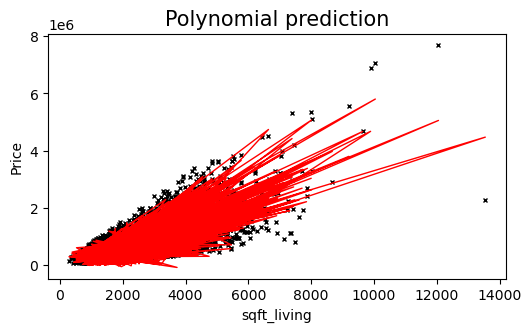

Parameters:  [-2.37278468e+03  6.71453281e+16  7.76573239e+04  1.61610672e+03
 -2.67640831e+16  3.20899442e+04 -1.49105197e+03  2.89459700e+04
 -5.00775996e+16  8.88960000e+04  5.55413798e+16  3.88800000e+03
 -7.99325000e+03  2.72000000e+03  1.63560000e+04 -9.10221061e+15
  3.06900000e+03 -2.69900000e+04 -1.75840000e+04 -1.70309162e+16
  4.68600000e+03  1.88890960e+16 -5.89805462e+15  1.50231250e+04
 -4.66600000e+03 -1.66316433e+16 -3.73800000e+03  4.38600000e+03
  1.00000000e+04 -3.11190474e+16 -1.18690000e+04  3.45143306e+16
 -3.86500000e+04  2.79800000e+03 -1.27132841e+15  5.08300000e+03
 -3.55200000e+03  2.73550000e+03 -2.37875046e+15  2.28865000e+04
  2.63828705e+15  6.10000000e+02  4.64792063e+15  1.81400000e+03
 -9.07200000e+03  5.22400000e+03  8.69660682e+15  1.30300000e+03
 -9.64546117e+15 -3.95081795e+15 -1.39352545e+16 -5.53057509e+15
  3.37695217e+15 -1.99654590e+16 -1.95298170e+16 -4.02172990e+16
  8.08000000e+02  5.75200000e+03  1.14060000e+04 -2.60739026e+16
  1.10300000

In [329]:
# Plot polynomial prediction
plt.figure(figsize=(13, 7))
plt.subplot(222)
plt.plot(Z['sqft_living'], Y, 'kx', markersize=3)
plt.plot(Z['sqft_living'], Yhat_Pipe, 'r', linewidth=1)
plt.title('Polynomial prediction', size=15)
plt.xlabel('sqft_living')
plt.ylabel('Price')
plt.show()

# Print model parameters
print('Parameters: ', pipe['model'].coef_)
print('Intercept : ', pipe['model'].intercept_)


# Model Evaluation and Refinement


Import the necessary modules:


In [331]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
print("done")

done


We will split the data into training and testing sets:


In [333]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]    
X = df[features]
Y = df['price']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)


print("number of test samples:", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples: 3242
number of training samples: 18371




Create and fit a Ridge regression object using the training data, set the regularization parameter to 0.1, and calculate the R^2 using the test data.


In [335]:
from sklearn.linear_model import Ridge

In [337]:
RidgeModel = Ridge(alpha=0.1) 
RidgeModel.fit(x_train, y_train)
Yhat_Ridge = RidgeModel.predict(x_test)
R_square_Ridge = RidgeModel.score(x_test, y_test)
print('The output of the first four predicted value is: ', Yhat_Ridge[0:4])
print('The R-square_Ridge is: ', R_square_Ridge)

The output of the first four predicted value is:  [651781.17964158 514958.12791318 794388.65874944 702639.20038573]
The R-square_Ridge is:  0.6478759163939114


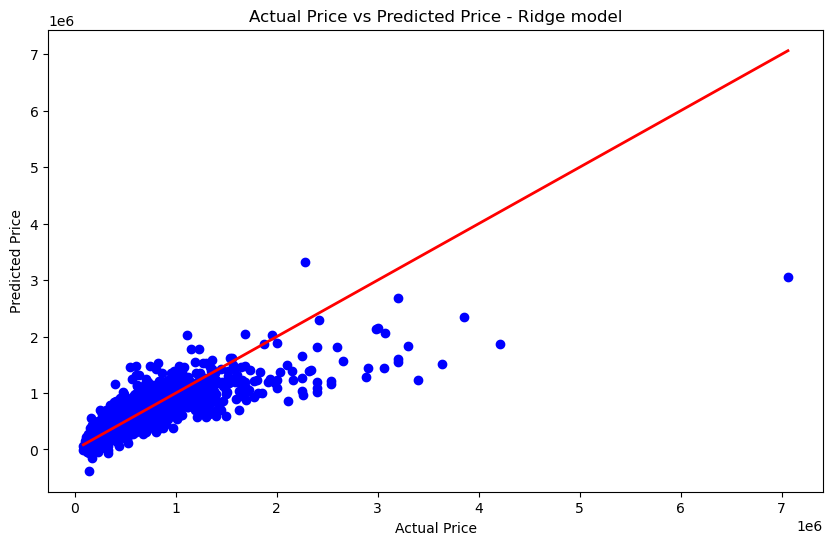

In [339]:
# Plot Actual vs Predicted Prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, Yhat_Ridge, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)  # Diagonal line
plt.title('Actual Price vs Predicted Price - Ridge model')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()



Perform a second order polynomial transform on both the training data and testing data. Create and fit a Ridge regression object using the training data, set the regularisation parameter to 0.1, and calculate the R^2 utilising the test data provided. Take a screenshot of your code and the R^2.


In [341]:
Poly = PolynomialFeatures(degree=2)
x_train_Poly = Poly.fit_transform(x_train)
x_test_Poly = Poly.fit_transform(x_test)
RidgeModel = Ridge(alpha=0.1) 
RidgeModel.fit(x_train_Poly, y_train)
Yhat_Ridge_Poly = RidgeModel.predict(x_test_Poly)
R_square_Ridge_Poly = RidgeModel.score(x_test_Poly, y_test)
print('The output of the first four predicted value is: ', Yhat_Ridge_Poly[0:4])
print('The R-square_Ridge_Poly is: ', R_square_Ridge_Poly)

The output of the first four predicted value is:  [569564.07771334 487971.30477988 676763.58195072 690525.95435935]
The R-square_Ridge_Poly is:  0.700274423550504


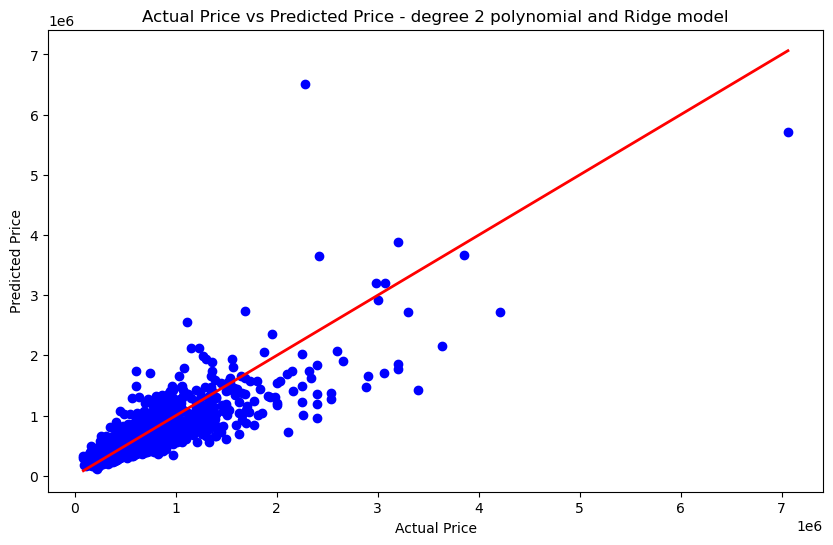

In [343]:
# Plot Actual vs Predicted Prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, Yhat_Ridge_Poly, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)  # Diagonal line
plt.title('Actual Price vs Predicted Price - degree 2 polynomial and Ridge model')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()

# Time series

In [383]:
df.head(5)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [385]:
df_time = df.copy()
df_time['date'] = pd.to_datetime(df_time['date'], errors='coerce')
df_time.head(5)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,221900.0,3.0,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,2014-12-09,538000.0,3.0,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2015-02-25,180000.0,2.0,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2014-12-09,604000.0,4.0,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,2015-02-18,510000.0,3.0,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


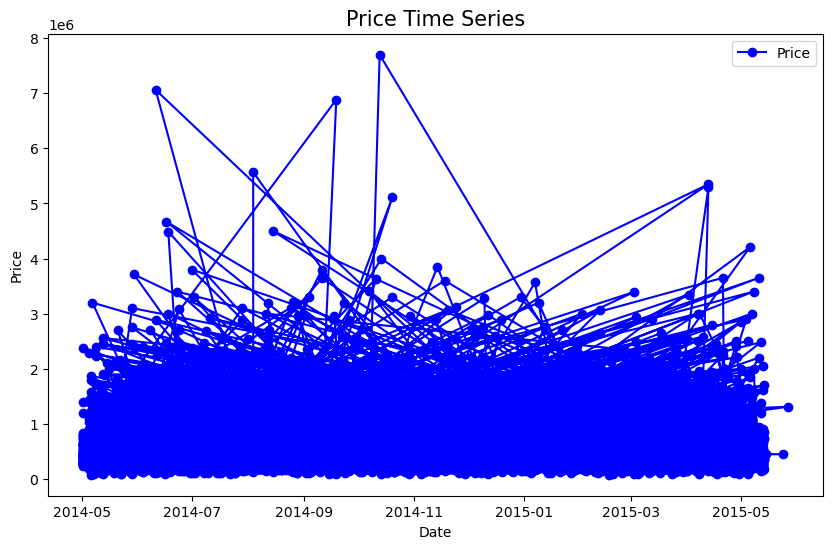

In [387]:
df_time.set_index('date', inplace=True)

# Plot the time series
plt.figure(figsize=(10, 6))
plt.plot(df_time.index, df_time['price'], marker='o', linestyle='-', color='b', label='Price')
plt.title('Price Time Series', size=15)
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [389]:
df_time.sort_values('date', inplace=True)

In [391]:
df_time

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
date,,,,,,,,,,,,,,,,,,,
2014-05-02,437500.0,3.0,2.25,1970,35100,2.0,0,0,4,9,1970,0,1977,0,98027,47.4635,-121.991,2340,35100
2014-05-02,790000.0,3.0,2.50,2600,4750,1.0,0,0,4,9,1700,900,1951,0,98117,47.6833,-122.400,2380,4750
2014-05-02,675000.0,5.0,2.50,2820,67518,2.0,0,0,3,8,2820,0,1979,0,98029,47.5794,-122.025,2820,48351
2014-05-02,555000.0,4.0,2.50,3310,6500,2.0,0,0,3,8,3310,0,2012,0,98065,47.5150,-121.870,2380,5000
2014-05-02,440000.0,4.0,2.25,2160,8119,1.0,0,0,3,8,1080,1080,1966,0,98006,47.5443,-122.177,1850,9000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-05-14,183000.0,3.0,1.00,1170,7320,1.0,0,0,3,7,1170,0,1962,0,98188,47.4685,-122.282,2040,7320
2015-05-14,359000.0,2.0,2.75,1370,1140,2.0,0,0,3,8,1080,290,2009,0,98133,47.7052,-122.343,1370,1090
2015-05-15,450000.0,5.0,2.00,1870,7344,1.5,0,0,3,7,1870,0,1960,0,98007,47.5951,-122.144,1870,7650


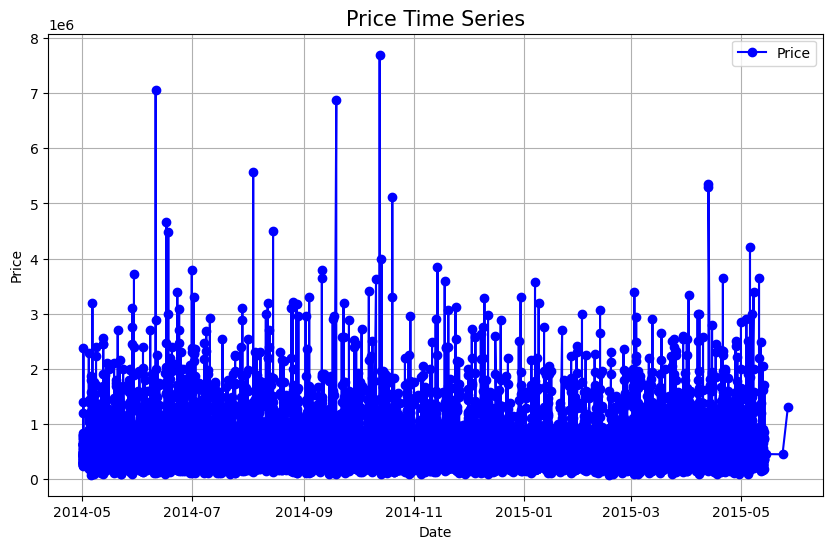

In [393]:
plt.figure(figsize=(10, 6))
plt.plot(df_time.index, df_time['price'], marker='o', linestyle='-', color='b', label='Price')
plt.title('Price Time Series', size=15)
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.legend()
plt.show()

In [395]:
df_time_mean = df_time.groupby('date').mean()

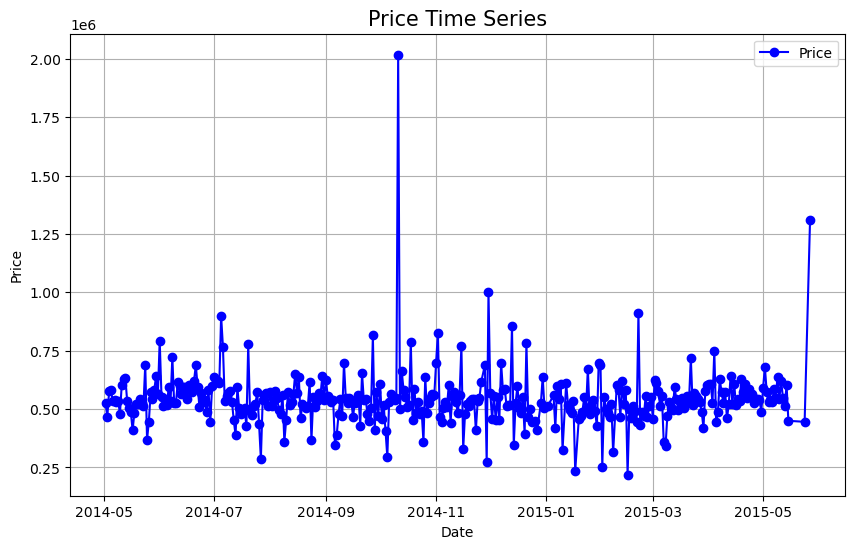

In [397]:
plt.figure(figsize=(10, 6))
plt.plot(df_time_mean.index, df_time_mean['price'], marker='o', linestyle='-', color='b', label='Price')
plt.title('Price Time Series', size=15)
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.legend()
plt.show()

## Time series (Year built)

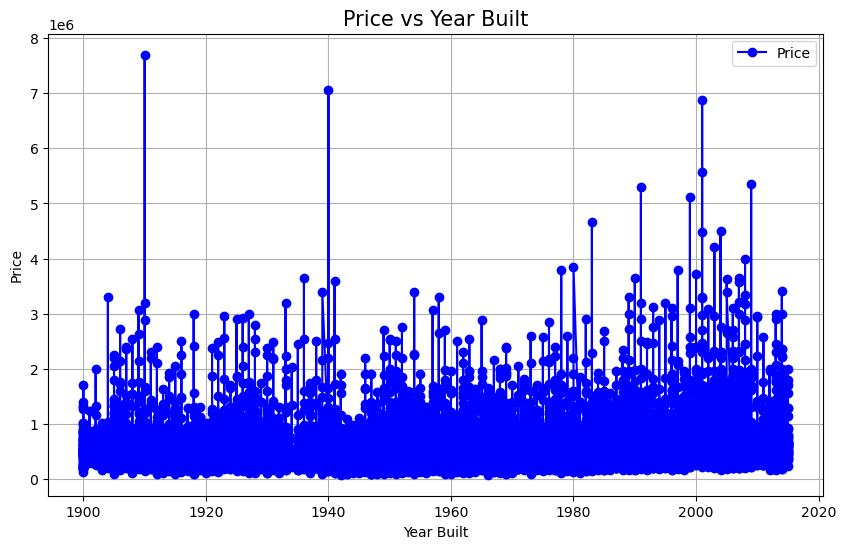

In [401]:
df_year = df.copy()
df_year.sort_values('yr_built', inplace=True)
# Plot the time series
plt.figure(figsize=(10, 6))
plt.plot(df_year['yr_built'], df_year['price'], marker='o', linestyle='-', color='b', label='Price')
plt.title('Price vs Year Built', size=15)
plt.xlabel('Year Built')
plt.ylabel('Price')
plt.grid(True)
plt.legend()
plt.show()

In [425]:
df_year = df.copy()
df_year_mean = df_year.drop('date', axis = 1)
df_year_mean.sort_values('yr_built', inplace=True)
df_year_mean.set_index('yr_built', inplace=True)
df_year_mean = df_year_mean.groupby('yr_built').mean()


In [427]:
df_year_mean.head(5)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
yr_built,,,,,,,,,,,,,,,,,,
1900,581387.206897,3.275862,1.729885,1732.011494,10869.597701,1.505747,0.000000,0.252874,3.528736,6.873563,1487.068966,244.942529,435.344828,98104.655172,47.594106,-122.288874,1667.114943,7222.195402
1901,556935.931034,3.620690,1.577586,1763.620690,4142.931034,1.568966,0.000000,0.068966,3.655172,7.034483,1513.620690,250.000000,68.517241,98121.000000,47.630710,-122.329793,1530.965517,3947.862069
1902,673007.407407,3.555556,1.925926,1919.629630,4766.518519,1.740741,0.000000,0.074074,3.629630,7.444444,1784.074074,135.555556,145.740741,98116.518519,47.616689,-122.314556,1913.703704,4576.888889
1903,480958.195652,3.065217,1.505435,1507.739130,6364.565217,1.456522,0.021739,0.239130,3.500000,6.869565,1402.869565,104.869565,260.130435,98105.608696,47.591474,-122.287261,1537.608696,5303.760870
1904,583756.644444,2.911111,1.500000,1603.177778,5410.000000,1.344444,0.000000,0.066667,3.800000,6.911111,1307.177778,296.000000,266.400000,98117.933333,47.609891,-122.316822,1630.222222,4600.066667


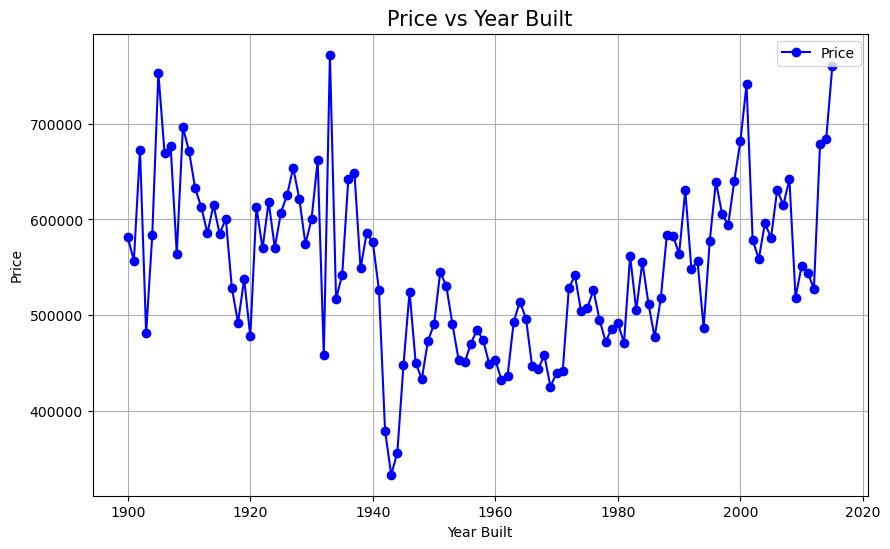

In [429]:
# Plot the time series
plt.figure(figsize=(10, 6))
plt.plot(df_year_mean.index, df_year_mean['price'], marker='o', linestyle='-', color='b', label='Price')
plt.title('Price vs Year Built', size=15)
plt.xlabel('Year Built')
plt.ylabel('Price')
plt.grid(True)
plt.legend()
plt.show()